In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

df = pd.read_csv('data.csv')

In [2]:
hd=pd.DataFrame([df.columns.values.tolist(),
                [type(df.loc[1][i]) for i in range(0,20)]],
               index=['coulumn_name','column_type'])
hd

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
coulumn_name,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
column_type,<class 'str'>,<class 'str'>,<class 'numpy.int64'>,<class 'str'>,<class 'str'>,<class 'numpy.int64'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,...,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'numpy.float64'>,<class 'str'>,None


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

3488
3555


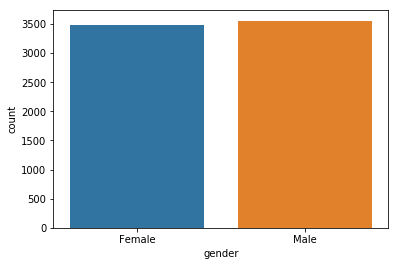

In [5]:
plt_gender=sns.countplot(x='gender', data=df)
print((df['gender']=='Female').sum())
print((df['gender']=='Male').sum())

In [6]:
hb=pd.DataFrame([[(df['SeniorCitizen']==1).sum(),(df['SeniorCitizen']==0).sum()],
                [(df['Partner']=='Yes').sum(),(df['Partner']=='No').sum()],
                [(df['Dependents']=='Yes').sum(),(df['Dependents']=='No').sum()]],
                index=['is SeniorCitizen','have partner','have dependents'],
                columns=['yes','no'])
hb

,yes,no
is SeniorCitizen,1142,5901
have partner,3402,3641
have dependents,2110,4933


(array([1854.,  953.,  762.,  653.,  648.,  690.,  832.,  651.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80]),
 <a list of 8 Patch objects>)

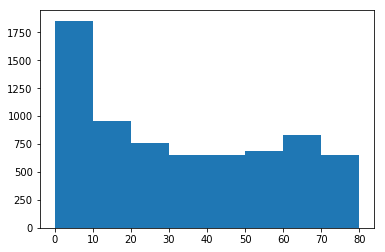

In [7]:
plt2=plt.hist(df['tenure'],[0,10,20,30,40,50,60,70,80],histtype='bar')
plt2

682 1048 691 0 1158 1938 0 1184 342


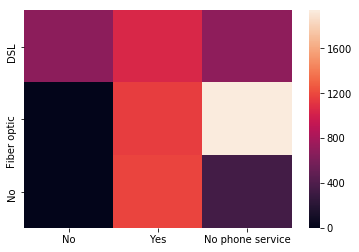

In [71]:
n1=0
n2=0
n3=0
n4=0
n5=0
n6=0
n7=0
n8=0
n9=0
for i in range(0,7043):
    if(df.loc[i]['MultipleLines']=='No phone service' and df.loc[i]['InternetService']=='DSL'):
        n1+=1
    elif(df.loc[i]['MultipleLines']=='No' and df.loc[i]['InternetService']=='DSL'):
        n2+=1
    elif(df.loc[i]['MultipleLines']=='Yes' and df.loc[i]['InternetService']=='DSL'):
        n3+=1
    elif(df.loc[i]['MultipleLines']=='No phone service' and df.loc[i]['InternetService']=='Fiber optic'):
        n4+=1
    elif(df.loc[i]['MultipleLines']=='No' and df.loc[i]['InternetService']=='Fiber optic'):
        n5+=1
    elif(df.loc[i]['MultipleLines']=='Yes' and df.loc[i]['InternetService']=='Fiber optic'):
        n6+=1
    elif(df.loc[i]['MultipleLines']=='No phone service' and df.loc[i]['InternetService']=='No'):
        n7+=1
    elif(df.loc[i]['MultipleLines']=='No' and df.loc[i]['InternetService']=='No'):
        n8+=1
    elif(df.loc[i]['MultipleLines']=='Yes' and df.loc[i]['InternetService']=='No'):
        n9+=1
sns.heatmap([[n1,n2,n3],[n4,n5,n6],[n7,n8,n9]],xticklabels={'No phone service','No','Yes'},yticklabels={'DSL','Fiber optic','No'})
print(n1,n2,n3,n4,n5,n6,n7,n8,n9)

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

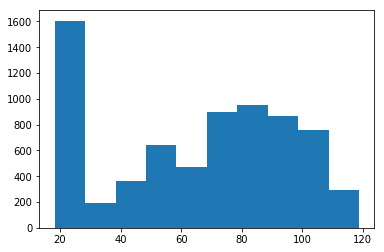

In [8]:
plt3=plt.hist(df['MonthlyCharges'])
plt3

E:\Anaconda3-5.3.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


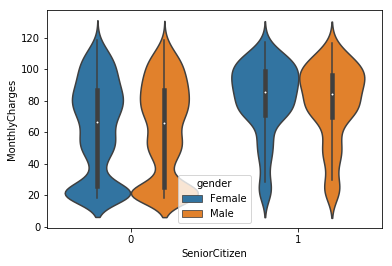

In [10]:
plt4=sns.violinplot(x='SeniorCitizen',y='MonthlyCharges',data=df,hue='gender')
plt4

E:\Anaconda3-5.3.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


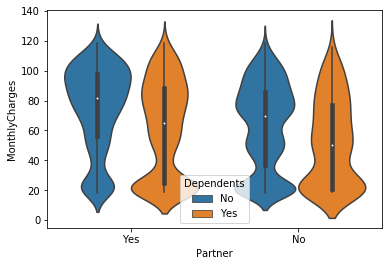

In [11]:
plt5=sns.violinplot(x='Partner',y='MonthlyCharges',data=df,hue='Dependents')
plt5

No: 73.46%
Yes: 26.54%


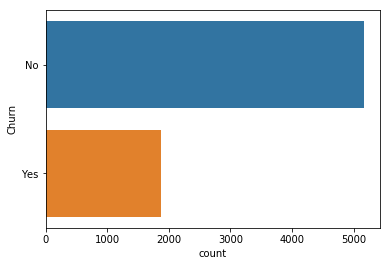

In [17]:
plt6=sns.countplot(y='Churn',data=df)
plt6
a=(df['Churn']=='No').sum()/7043*100
b=(df['Churn']=='Yes').sum()/7043*100
print("No:",'%.2f'%a+"%")
print("Yes:","%.2f"%b+"%")

E:\Anaconda3-5.3.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


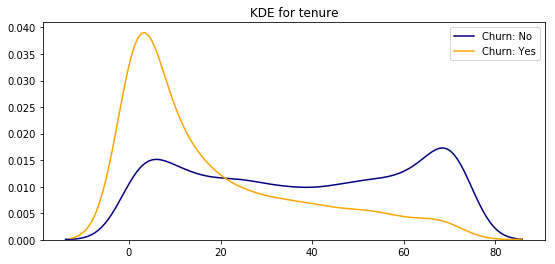

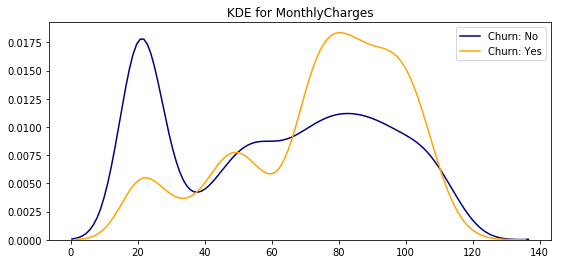

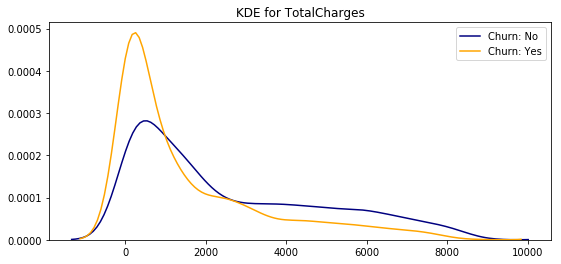

In [19]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

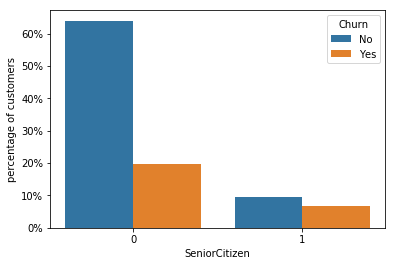

In [3]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if(orient=='v'):
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

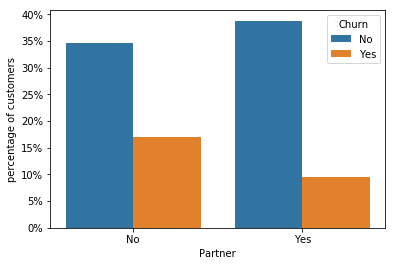

In [22]:
barplot_percentages("Partner")


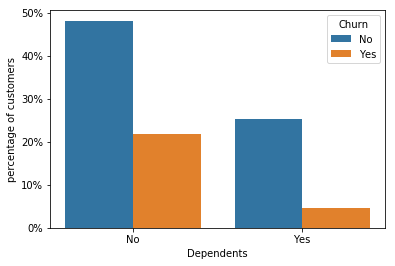

In [23]:
barplot_percentages("Dependents")

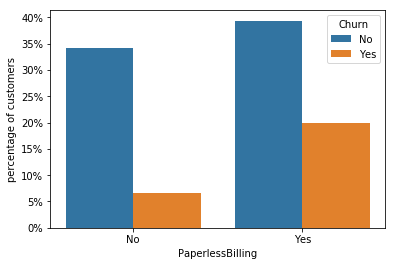

In [4]:
barplot_percentages("PaperlessBilling")

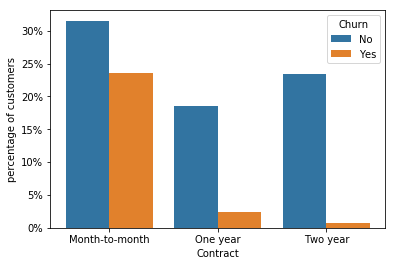

In [6]:
barplot_percentages("Contract")

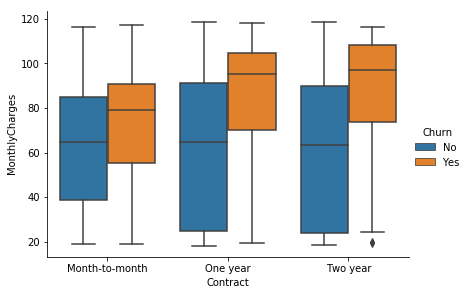

In [5]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

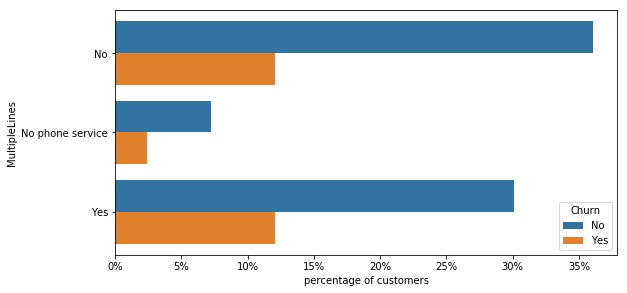

In [25]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

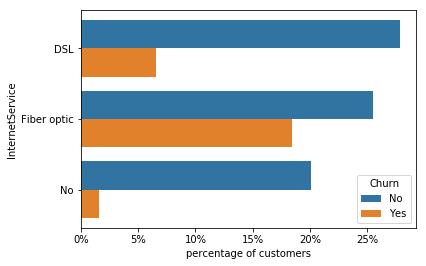

In [27]:
barplot_percentages("InternetService", orient='h')

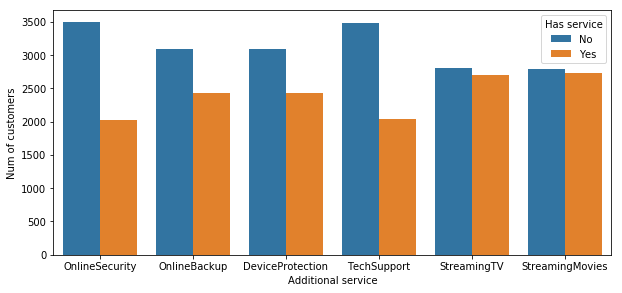

In [28]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

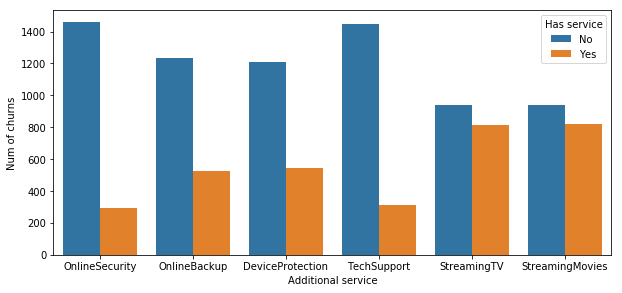

In [29]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

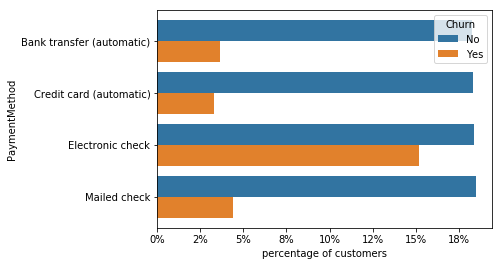

In [33]:
barplot_percentages("PaymentMethod", orient='h')

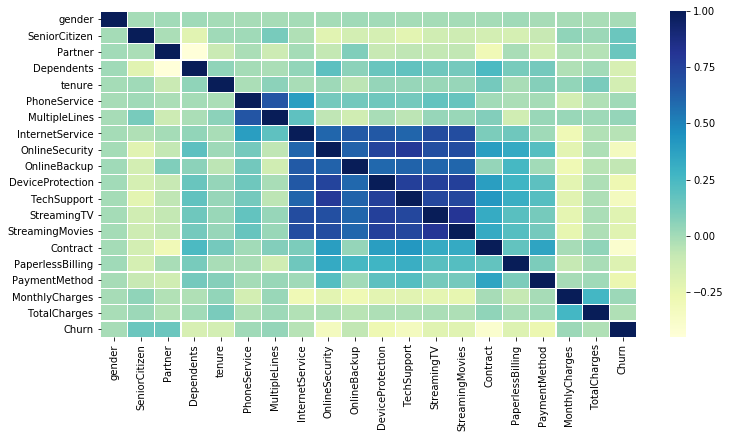

In [34]:
plt.figure(figsize=(12, 6))
df.drop(['customerID'],axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

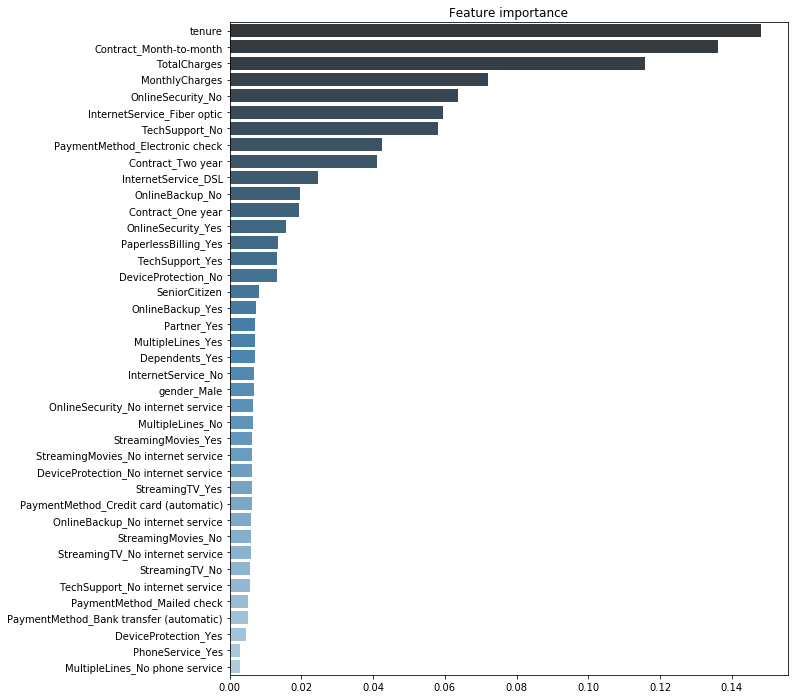

In [39]:
from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.savefig('./1.jpg',bbox_inches = 'tight')